In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
rating=pd.read_csv("A:\\dataset\\movie.csv")

In [13]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [14]:
movie_name=pd.read_csv("A:\\dataset\\movie_name.csv")

In [16]:
movie_name.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
#we can merge them together
df=pd.merge(rating,movie_name,on='movieId')

In [18]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [20]:
df.drop(['genres'],axis=1,inplace=True)

In [21]:
df.tail()

,userId,movieId,rating,timestamp,title
100831,610,160341,2.5,1479545749,Bloodmoon (1997)
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971)
100833,610,160836,3.0,1493844794,Hazard (2005)
100834,610,163937,3.5,1493848789,Blair Witch (2016)
100835,610,163981,3.5,1493850155,31 (2016)


In [22]:
#Let's create a ratings a dataframe with average rating and number of ratings.
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [70]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

In [24]:
df.shape

(100836, 5)

In [25]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())

In [27]:
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [28]:
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
dtype: int64

In [55]:
ratings['num of ratings']=pd.DataFrame(df.groupby('title')['rating'].count())
ratings['num of ratings'].head()

title
'71 (2014)                                 1
'Hellboy': The Seeds of Creation (2004)    1
'Round Midnight (1986)                     2
'Salem's Lot (2004)                        1
'Til There Was You (1997)                  2
Name: num of ratings, dtype: int64

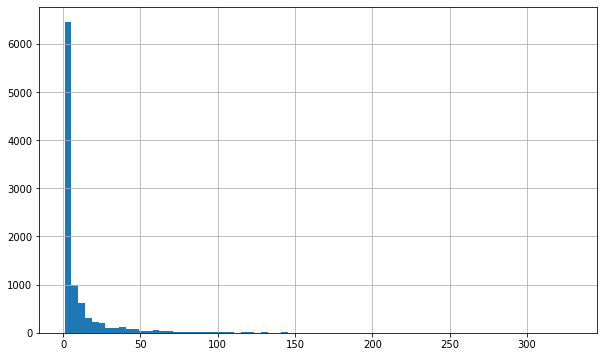

In [56]:
plt.figure(figsize=(10,6))
ratings['num of ratings'].hist(bins=75)

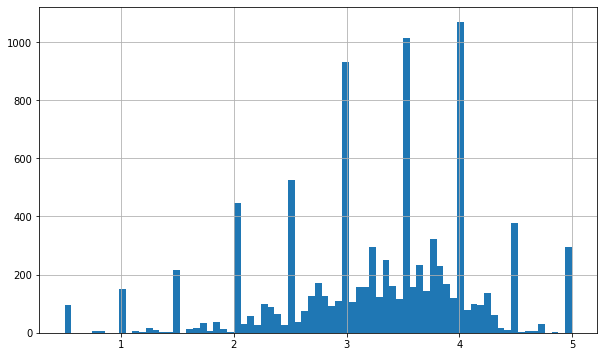

In [57]:
plt.figure(figsize=(10,6))
ratings['rating'].hist(bins=75)

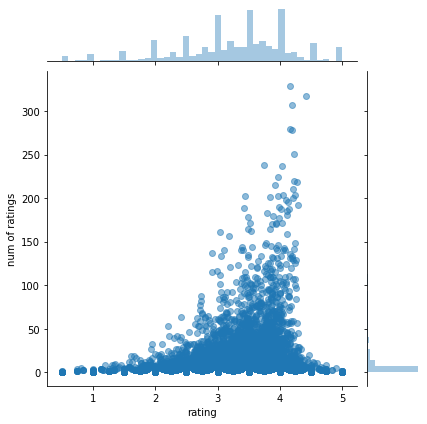

In [58]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [59]:
# RECOMMEDING SIMILIAR MOVIES
# Now lets create a matrix that has the user ids on one access and the movies title on another axis.Each cell will then consist of the rating the user gave to that movie.
# Note there will be a lot NaN values ,beacuse most people have not seen most of the movies
moviemat=df.pivot_table(index="userId",columns="title",values="rating")
moviemat.tail()#based on the ratings to recommed the movie

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,...,NaN,4.0,3.5,3.0,NaN,NaN,2.0,1.5,NaN,NaN


In [60]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [61]:
forest_gumb_rating=moviemat['Forrest Gump (1994)']
jurassic_park_rating=moviemat['Jurassic Park (1993)']

In [62]:
forest_gumb_rating.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [63]:
jurassic_park_rating.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Jurassic Park (1993), dtype: float64

In [64]:
#We can then use corrwith() method to get correlation between two pandas series
similiar_to_forest=moviemat.corrwith(forest_gumb_rating)
similiar_to_jurassic=moviemat.corrwith(jurassic_park_rating)

C:\Users\karthick\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\karthick\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [65]:
#Lets clean this by removing NaN values and suing a DataFrame instead of a series;
corr_forest=pd.DataFrame(similiar_to_forest,columns=['Correlation'])
corr_forest.dropna(inplace=True)
corr_forest.head()
#this movie will be recommeded because of high correlation

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [ ]:
#Now if we sort dataframe by correlation we should get the most similiar movies,however note that we get some results taht don't really make sense.
#this is because there are a lot of movies only watched once by users who also watched forest dumb(it was most popular movie)

In [66]:
corr_forest.sort_values('Correlation',ascending=False).head()

,Correlation
title,
Lost & Found (1999),1.0
"Cercle Rouge, Le (Red Circle, The) (1970)",1.0
Play Time (a.k.a. Playtime) (1967),1.0
Killers (2010),1.0
Playing God (1997),1.0


In [67]:
corr_forest=corr_forest.join(ratings['num of ratings'])
corr_forest.head()

,Correlation,num of ratings
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [68]:
#Now sort the values and notice how the titles makes a lot more sense
corr_forest[corr_forest['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125


In [69]:
corr_jurassic=pd.DataFrame(similiar_to_jurassic,columns=['Correlation'])
corr_jurassic.dropna(inplace=True)
corr_jurassic=corr_jurassic.join(ratings['num of ratings'])
corr_jurassic[corr_jurassic['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Jurassic Park (1993),1.000000,238
Outbreak (1995),0.533780,101
Ghostbusters (a.k.a. Ghost Busters) (1984),0.522286,120
"Fugitive, The (1993)",0.460603,190
Indiana Jones and the Temple of Doom (1984),0.456533,108
